In [2]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.io
# pip install scipy SI ES Q NO LO TIENEN INSTALADO

In [5]:
# Definimos la ruta del archivo .mat
file_path = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2026-1\S03_datasets\BCT\macaque47.mat"

# Leemos el contenido del archivo .mat
file_dict = scipy.io.loadmat(file_path)

In [6]:
file_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jun 29 12:11:31 2007',
 '__version__': '1.0',
 '__globals__': [],
 'CIJ': array([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(47, 47), dtype=uint8),
 'Names': array(['1   ', '2   ', '35  ', '36  ', '46  ', '5   ', 'Id  ', 'VP  ',
        '3a  ', '3b  ', '4   ', '6   ', '7a  ', '7b  ', 'AITd', 'AITv',
        'CITd', 'CITv', 'DP  ', 'FEF ', 'FST ', 'Ig  ', 'LIP ', 'MDP ',
        'MIP ', 'MSTd', 'MSTl', 'MT  ', 'PIP ', 'PITd', 'PITv', 'PO  ',
        'Ri  ', 'SII ', 'SMA ', 'STPa', 'STPp', 'TF  ', 'TH  ', 'V1  ',
        'V2  ', 'V3  ', 'V3A ', 'V4  ', 'V4t ', 'VIP ', 'VOT '],
       dtype='<U4')}

In [7]:
matriz = file_dict['CIJ']
columnas = file_dict['Names']

In [10]:
matriz.shape, len(columnas)

((47, 47), 47)

In [11]:
macaco_df = pd.DataFrame(data=matriz, columns=columnas, index=columnas)

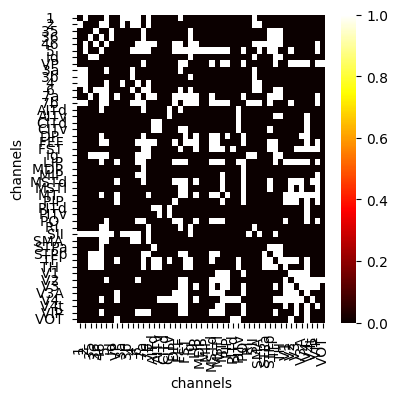

In [18]:
plt.figure(figsize=(4, 4))
ax = sns.heatmap(macaco_df.values,
                 annot=False, cmap='hot', fmt=".2f",
                 xticklabels=macaco_df.columns, yticklabels=macaco_df.index)
ax.set(xlabel="channels", ylabel="channels")
plt.show()

# Actividad. 
1. Filtrar el dataframe para quedarse con las columnas 15 a 35 y las filas 15 a 35,
2. Mostrar el mapa de calor
3. Crear el grafo dirigido
4. Calcular el grado del grafo

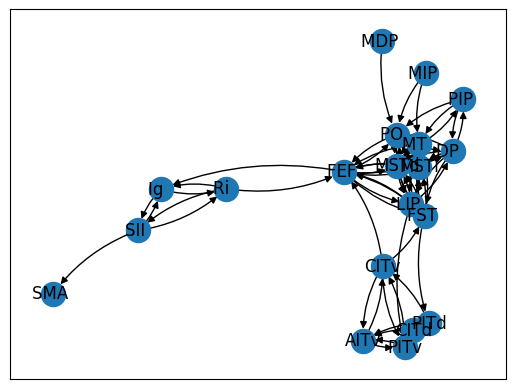

In [19]:
G = nx.from_pandas_adjacency(macaco_df.iloc[15: 35, 15: 35], create_using=nx.DiGraph())

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.15')